# Assignment 04

# Subject : Machine learing and data Mining

In [2]:
# Add group name, group member names, and their matriculation numbers

Group Name : guttag

In [3]:
# Load modules
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Import

In [4]:
# Load data from CSV file
df = pd.DataFrame()
df = pd.read_csv('data.csv', dtype={'Radius (cm)': float, 'Weight (grams)': float})

# Replace zero values with median value within class 
df = df.groupby(['Fruit (class)']) # sort by class
proc_df = pd.DataFrame() # create a new dataframe to collect results
for key, group in df: # go over groups
    group = group.replace(0, group.median(axis=0)) # replace missing values with median
    proc_df = pd.concat([proc_df, group]) # concatenate groups into new dataframe
df = proc_df.sort_index() # overwrite original dataframe with results

# Normalize
radius = df['Radius (cm)']
df['Radius (cm)'] = (radius-radius.min())/(radius.max()-radius.min())
radius = df['Weight (grams)']
df['Weight (grams)'] = (radius-radius.min())/(radius.max()-radius.min())

In [5]:
# Radius values
radius = list(df['Radius (cm)'])
print(radius)

[0.06451612903225798, 0.6451612903225805, 0.48387096774193544, 0.16129032258064516, 0.0, 0.1290322580645161, 0.3225806451612903, 1.0, 0.1290322580645161, 0.3548387096774194, 0.5161290322580645, 0.09677419354838704, 0.8064516129032256, 0.7096774193548386, 0.6451612903225805, 0.2580645161290322, 0.7741935483870968, 0.06451612903225798, 0.5161290322580645, 0.6451612903225805, 0.09677419354838704, 0.0, 0.19354838709677422, 0.4193548387096773, 0.6774193548387097, 0.29032258064516125, 0.3548387096774194, 0.1290322580645161, 0.0, 0.3225806451612903, 0.7096774193548386, 0.9354838709677419]


In [6]:
# Weight values
weight = list(df['Weight (grams)'])
print(weight)

[0.15037593984962405, 0.2631578947368421, 1.0, 0.13533834586466165, 0.0, 0.3458646616541353, 0.21804511278195488, 0.7593984962406015, 0.22556390977443608, 0.2932330827067669, 0.45864661654135336, 0.21052631578947367, 0.8421052631578947, 0.6992481203007519, 0.15037593984962405, 0.09774436090225563, 0.5263157894736842, 0.15037593984962405, 0.45864661654135336, 0.7142857142857143, 0.20300751879699247, 0.18045112781954886, 0.24812030075187969, 0.3007518796992481, 0.6466165413533834, 0.43609022556390975, 0.18045112781954886, 0.18796992481203006, 0.0, 0.3383458646616541, 0.7293233082706767, 0.7669172932330827]


In [7]:
# Classes
classes = list(df['Fruit (class)'])
print(classes)

['Lemon', 'Apple', 'Pear', 'Lemon', 'Lemon', 'Apple', 'Lemon', 'Pear', 'Apple', 'Apple', 'Apple', 'Lemon', 'Pear', 'Pear', 'Lemon', 'Lemon', 'Pear', 'Lemon', 'Apple', 'Pear', 'Lemon', 'Apple', 'Apple', 'Apple', 'Pear', 'Apple', 'Lemon', 'Lemon', 'Lemon', 'Apple', 'Pear', 'Pear']


In [8]:
# Combine radius, weight, and class to tuples (we have to keep the class for later plotting)
tuples = list(zip(radius, weight, classes))
print(tuples)

[(0.06451612903225798, 0.15037593984962405, 'Lemon'), (0.6451612903225805, 0.2631578947368421, 'Apple'), (0.48387096774193544, 1.0, 'Pear'), (0.16129032258064516, 0.13533834586466165, 'Lemon'), (0.0, 0.0, 'Lemon'), (0.1290322580645161, 0.3458646616541353, 'Apple'), (0.3225806451612903, 0.21804511278195488, 'Lemon'), (1.0, 0.7593984962406015, 'Pear'), (0.1290322580645161, 0.22556390977443608, 'Apple'), (0.3548387096774194, 0.2932330827067669, 'Apple'), (0.5161290322580645, 0.45864661654135336, 'Apple'), (0.09677419354838704, 0.21052631578947367, 'Lemon'), (0.8064516129032256, 0.8421052631578947, 'Pear'), (0.7096774193548386, 0.6992481203007519, 'Pear'), (0.6451612903225805, 0.15037593984962405, 'Lemon'), (0.2580645161290322, 0.09774436090225563, 'Lemon'), (0.7741935483870968, 0.5263157894736842, 'Pear'), (0.06451612903225798, 0.15037593984962405, 'Lemon'), (0.5161290322580645, 0.45864661654135336, 'Apple'), (0.6451612903225805, 0.7142857142857143, 'Pear'), (0.09677419354838704, 0.203007

## Clustering

In [10]:
# Squared Euclidean distance (use this as delta function)
def distance(p1,p2):
    dist = (p2[0]-p1[0])**2+(p2[1]-p1[1])**2
    return dist

# Takes points as list of tuples and a threshold.
# Example call: do_cluster([(2,1,'Apple'),(6,3,'Lemon'),(1,1.5,'Apple'),(2,2,'Pear')], 7)
def do_cluster(tuples, threshold):
    
    clusters = [] 
    
    ###############################################
    # IMPLEMENT SINGLE PASS CLUSTERING HERE       #
    ###############################################
    
    # TODO
    
#     Initialize empty set 𝑍 of corresponding cluster centroids
    centroids = []
#     For each object 𝑜 ∈ 𝑂, do:
    for o in tuples:

        flag = False
#         For each cluster 𝜔𝑖 ∈ Ω, do:
        for idx, w in enumerate(clusters):
          
            dist = distance(o, centroids[idx])
            if dist <= threshold:

                x = (centroids[idx][0]*len(clusters[idx])+o[0])/(len(clusters[idx])+1)
                y = (centroids[idx][1]*len(clusters[idx])+o[1])/(len(clusters[idx])+1)
                clusters[idx].append(o)
#                 Update centroid with 𝑧𝑖 =1/|𝜔𝑖|⋅ 𝑜 + |𝜔𝑖|−1/|𝜔𝑖|⋅ 𝑧�
                centroids[idx] = (x,y)
                flag = True
                break
        if not flag:
            
#             Put 𝑜 into 𝜔�
            clusters.append([o])
            centroids.append(o)
       
    ###############################################
    # END OF TASK                                 #
    ###############################################
    
    return clusters # e.g., [[(2, 1, 'Apple'), (1, 1.5, 'Apple'), (2, 2, 'Pear')], [(6, 3, 'Lemon')]]

# Call to cluster
clusters = do_cluster(tuples, 0.33) # distance threshold, aka Delta, is set to 0.33
print(clusters)

# Hint: Final clusters should look like the following:
# [[(0.06451612903225798, 0.15037593984962405, 'Lemon'), (0.16129032258064516, 0.13533834586466165, 'Lemon'), ...

[[(0.06451612903225798, 0.15037593984962405, 'Lemon'), (0.16129032258064516, 0.13533834586466165, 'Lemon'), (0.0, 0.0, 'Lemon'), (0.1290322580645161, 0.3458646616541353, 'Apple'), (0.3225806451612903, 0.21804511278195488, 'Lemon'), (0.1290322580645161, 0.22556390977443608, 'Apple'), (0.3548387096774194, 0.2932330827067669, 'Apple'), (0.5161290322580645, 0.45864661654135336, 'Apple'), (0.09677419354838704, 0.21052631578947367, 'Lemon'), (0.6451612903225805, 0.15037593984962405, 'Lemon'), (0.2580645161290322, 0.09774436090225563, 'Lemon'), (0.06451612903225798, 0.15037593984962405, 'Lemon'), (0.5161290322580645, 0.45864661654135336, 'Apple'), (0.09677419354838704, 0.20300751879699247, 'Lemon'), (0.0, 0.18045112781954886, 'Apple'), (0.19354838709677422, 0.24812030075187969, 'Apple'), (0.4193548387096773, 0.3007518796992481, 'Apple'), (0.29032258064516125, 0.43609022556390975, 'Apple'), (0.3548387096774194, 0.18045112781954886, 'Lemon'), (0.1290322580645161, 0.18796992481203006, 'Lemon'), 

## Plotting

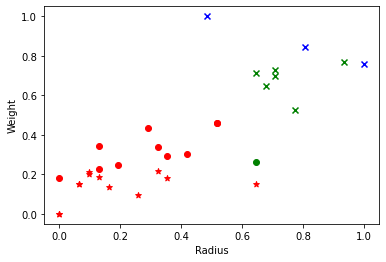

In [11]:
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange'] # provide some colors for the clusters
marker = {'Lemon': '*', 'Apple': 'o', 'Pear': 'x'} # different marker for each class
i = 0
for c in clusters:
    tpls = list(zip(*c))
    x = tpls[0]
    y = tpls[1]
    cls = tpls[2]
    c = colors[i%len(colors)]
    m = [marker[cl] for cl in cls]
    for _x, _y, _m in zip(x, y, m):
        plt.scatter(_x, _y, c=c, marker=_m)
    i += 1
plt.xlabel("Radius")
plt.ylabel("Weight")
plt.show()